<a href="https://colab.research.google.com/github/Will-Li-zw/MAIS_202_Final_Project/blob/master/finel_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import random
import heapq
import seaborn as sns
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop,Nadam,Adadelta,Adam
from tensorflow.keras.layers import BatchNormalization,LeakyReLU
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
rfc = RandomForestClassifier(n_estimators=30, max_depth=18, min_samples_split=4)


In [ ]:
data_raw = pd.read_csv("https://raw.githubusercontent.com/Will-Li-zw/MAIS-202/master/cardio_train.csv", sep=";")
data_raw.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
data_raw.drop("id",axis=1,inplace=True)
data_raw.drop_duplicates(inplace=True) #drop the same data
print("There is {} duplicated values in data frame".format(data_raw.duplicated().sum()))
print("There is {} missing values in data frame".format(data_raw.isnull().sum().sum()))

There is 0 duplicated values in data frame
There is 0 missing values in data frame


In [ ]:
x = data_raw.copy(deep=True) #detecting outliers
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
s_list = ["age", "height", "weight", "ap_hi", "ap_lo"] #standarlize the data
def standartization(x):
    x_std = x.copy(deep=True)
    for column in s_list:
        x_std[column] = (x_std[column]-x_std[column].mean())/x_std[column].std()
    return x_std 
x_std=standartization(x)
x_std

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-0.436071,2,0.443399,-0.847978,-0.122181,-0.088254,1,1,0,0,1,0
1,0.307635,1,-1.018016,0.749554,0.072577,-0.035205,3,1,0,0,1,1
2,-0.248017,1,0.078045,-0.709062,0.007658,-0.141303,3,1,0,0,0,1
3,-0.748143,2,0.565184,0.541180,0.137496,0.017844,1,1,0,0,1,1
4,-0.808532,1,-1.018016,-1.264725,-0.187100,-0.194352,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,-0.092791,2,0.443399,0.124433,-0.057262,-0.088254,1,1,1,0,1,0
69996,1.269386,1,-0.774447,3.597327,0.072577,-0.035205,2,2,0,0,1,1
69997,-0.163311,2,2.270168,2.138712,0.332253,-0.035205,3,1,0,1,0,1
69998,1.200486,1,-0.165524,-0.153399,0.040117,-0.088254,1,2,0,0,0,1


In [ ]:
y = x["cardio"] #devide the data and convert them into lists
y=list(y.values)
x.drop("cardio", axis=1,inplace=True)
x=list(x.values)
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

svm_clf = LinearSVC(random_state=0, tol=1e-5)
svm_clf.fit(x_train, y_train)
LinearSVC(random_state=0, tol=1e-05)
index=0 
right=0
for i in svm_clf.predict(x_test):
  if i==y_test[index]:
    right+=1
  index+=1
print(right/index)


0.5197199199771363


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

for dep in range(1):
  rfc = RandomForestClassifier()
  rfc.fit(x_train, y_train)

  index=0 
  right=0
  for i in rfc.predict(x_test):
    if i==y_test[index]:
      right+=1
    index+=1
  print(right/index)

0.7118462417833666


In [ ]:
x_pre=x_test[15].reshape(1,-1)
i=rfc.predict(x_pre)
i

array([1])

In [ ]:
class Predictor: 
    def __init__(self):
        self.model = rfc
    def predict(self, x_predict ):        
        preduction=rfc.predict(x_predict)
        print(prediction)
        return prediction


In [ ]:
prediction=0
predictor = Predictor()
x_pre=x_test[15]
#np.array([17623,	2,	169	,82.0	,150,	100	,1,	1	,0,	0	,1])

x_pre=x_pre.reshape(1,-1)
prediction = predictor.predict(x_pre)
prediction

0


0

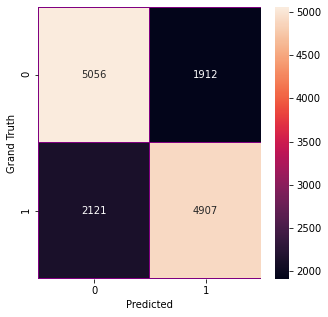

In [ ]:
y_true = y_test
y_pred = rfc.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,fmt=".0f", annot=True,linewidths=0.2, linecolor="purple", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Grand Truth")
plt.show()

In [ ]:


model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(6, input_dim=11, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
optimizer = Adam(learning_rate=0.002)
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau( 
    monitor='val_loss',    
    factor=0.5,       
    patience=50,       
    verbose=1,         
    mode="auto",      
    min_delta=0.0001, 
    cooldown=0,       
    min_lr=0.00001    
    )


history = model.fit(x=x_train, y=y_train,verbose=1,
                    batch_size=1024, epochs=900,
                   validation_data=(x_test,y_test),
                    callbacks=[learning_rate_reduction],
                    shuffle=True)

model.evaluate(x_test, y_test, verbose=2)

Epoch 1/900
55/55 [==============================] - 1s 12ms/step - loss: 3730.5291 - accuracy: 0.4993 - val_loss: 220.4461 - val_accuracy: 0.4979
Epoch 2/900
55/55 [==============================] - 0s 2ms/step - loss: 122.2451 - accuracy: 0.4975 - val_loss: 15.6004 - val_accuracy: 0.4508
Epoch 3/900
55/55 [==============================] - 0s 2ms/step - loss: 12.2803 - accuracy: 0.4277 - val_loss: 9.5648 - val_accuracy: 0.4184
Epoch 4/900
55/55 [==============================] - 0s 2ms/step - loss: 9.5827 - accuracy: 0.4087 - val_loss: 8.3538 - val_accuracy: 0.4133
Epoch 5/900
55/55 [==============================] - 0s 2ms/step - loss: 8.3620 - accuracy: 0.4022 - val_loss: 7.0546 - val_accuracy: 0.3998
Epoch 6/900
55/55 [==============================] - 0s 2ms/step - loss: 6.8459 - accuracy: 0.3864 - val_loss: 5.9701 - val_accuracy: 0.3795
Epoch 7/900
55/55 [==============================] - 0s 2ms/step - loss: 5.9714 - accuracy: 0.3767 - val_loss: 5.8846 - val_accuracy: 0.3965
Epo

[0.5858920216560364, 0.7136324644088745]